In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-Centric/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-Centric/test.csv')

In [3]:
train_df.head(3)

,ID,text,target,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 막따가 흐려저…남부지방 여튼 황사,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00


In [4]:
train_df.text.unique()

array(['유튜브 내달 2일까지 크리에이터 지원 공간 운영', '어버이날 막따가 흐려저…남부지방 여튼 황사',
       '내년부터 국가RD 평가 때 논문건수는 반영 않는다', ...,
       '아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...',
       '트럼프 미중 무역협상 1단계 합의 서명식 가질 것종합',
       '극적 역전승 도로공사 GS칼텍스 꺾고 2년 연속 챔프...'], dtype=object)

# Category 분석

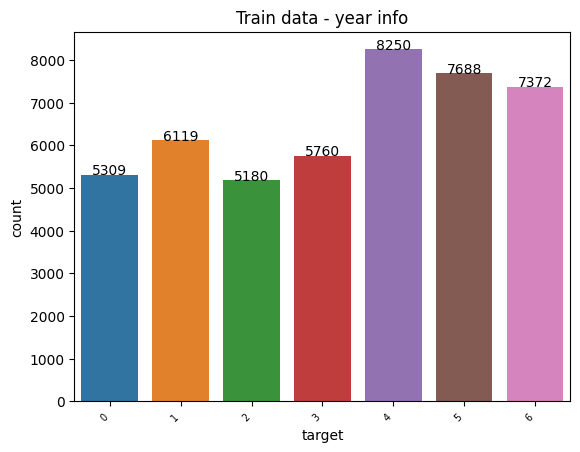

In [5]:
g = sns.countplot(x="target", data=train_df.sort_values('target'))

g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g.set_title('Train data - year info')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1,int(height),ha="center")

plt.show()

# 데이터 date 분석

In [6]:
year = []
day = []
for i in range(len(train_df)):
    year.append(int(train_df.date[i][:4]))
    day.append(train_df.date[i][:10])
train_df['year'] = year
train_df['day'] = day


In [7]:
train_df.sample(10)

,ID,text,target,url,date,year,day
26872,ynat-v1_train_26872,25개국 신인모델 한자리에…2224일 아시아 모델 페스티벌,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.06.20. 오전 11:16,2017,2017.06.20
2566,ynat-v1_train_02566,사법개혁특위 여야 공수처·검찰 중립성 충돌…파행 거듭종합,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.03.13. 오후 5:27,2018,2018.03.13
948,ynat-v1_train_00948,신간 잃어버린 잠을 찾아서·무엇이 강자를 만드는가,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.05.03. 오후 3:41,2018,2018.05.03
21351,ynat-v1_train_21351,경영난에 임대료도 못내는 부산북항 컨부두…800억원대 체납,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.08.17. 오후 2:04,2016,2016.08.17
38230,ynat-v1_train_38230,KT 브루클린 5G 서밋서 글로벌 협력 논의,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.04.23. 오전 9:00,2017,2017.04.23
10743,ynat-v1_train_10743,임신부의 술 주문 거부해선 안돼 뉴욕시 가이드라인 논란,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.07. 오후 3:52,2016,2016.05.07
13143,ynat-v1_train_13143,카드뉴스 비즈니스석 손님 먼저…패스트트랙 차별일까요,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.01. 오전 9:00,2018,2018.01.01
29346,ynat-v1_train_29346,朴대통녕 기명난법 꼉제충격 최소화 대챙 마련해야종합,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.08.02. 오후 5:39,2016,2016.08.02
38037,ynat-v1_train_38037,구글 퀴즈쇼 앱 개발 3사 간담회 개최,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.10. 오후 1:59,2018,2018.07.10
13296,ynat-v1_train_13296,트럼프 옛 변호사 코언 다음주 의회서 또 증언한다,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.03.01. 오후 4:07,2019,2019.03.01


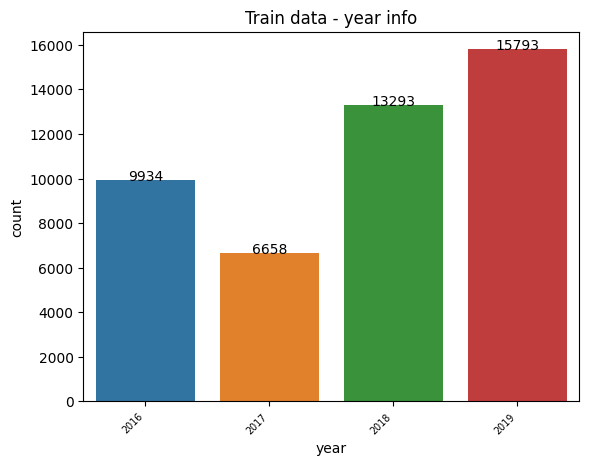

In [8]:
g = sns.countplot(x="year", data=train_df.sort_values('year'))

g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g.set_title('Train data - year info')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1,int(height),ha="center")

plt.show()

<ipython-input-9-36b04738cb0e>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45,


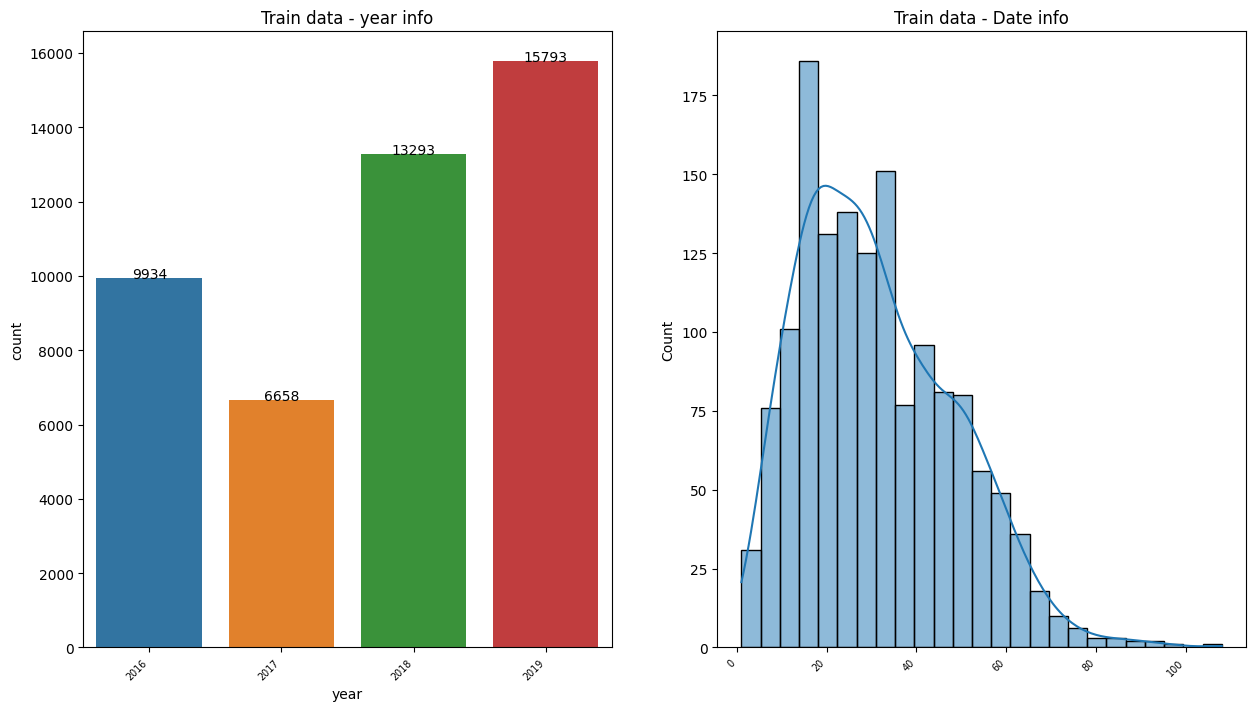

In [9]:
fig , axes = plt.subplots(1,2,figsize=(15, 8))
axx = axes.flatten()

g = sns.countplot(x="year", data=train_df.sort_values('year'), ax=axx[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g.set_title('Train data - year info')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1,int(height),ha="center")

# g = sns.histplot(x="day", data=train_df.sort_values('day'), ax=axx[1])


grouped = train_df.groupby(train_df['day'])

grouped = grouped.size()
grouped.columns = ['count']
g = sns.histplot(data=grouped, kde=True, ax=axx[1])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g.set_title('Train data - Date info')
# for p in g.patches:
#     height = p.get_height()
#     g.text(p.get_x()+p.get_width()/2., height + 0.1,int(height),ha="center")
plt.show()

<ipython-input-10-85d46a440984>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45,
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


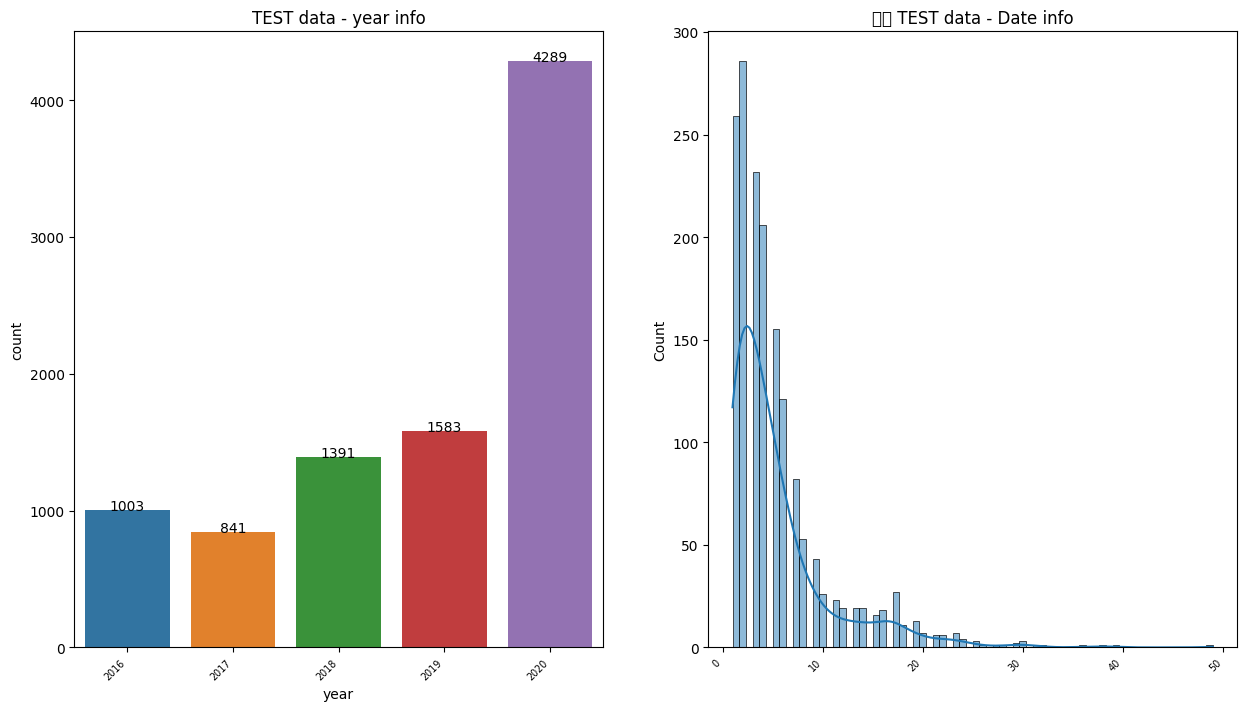

In [10]:
year = []
day = []
for i in range(len(test_df)):
    year.append(int(test_df.date[i][:4]))
    day.append(test_df.date[i][:10])
test_df['year'] = year
test_df['day'] = day

fig , axes = plt.subplots(1,2,figsize=(15, 8))
axx = axes.flatten()

g = sns.countplot(x="year", data=test_df.sort_values('year'), ax=axx[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g.set_title('TEST data - year info')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1,int(height),ha="center")

# g = sns.histplot(x="day", data=test_df.sort_values('day'), ax=axx[1])


grouped = test_df.groupby(test_df['day'])

grouped = grouped.size()
grouped.columns = ['count']
g = sns.histplot(data=grouped, kde=True, ax=axx[1])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g.set_title('한글 TEST data - Date info')
# for p in g.patches:
#     height = p.get_height()
#     g.text(p.get_x()+p.get_width()/2., height + 0.1,int(height),ha="center")
plt.show()

# wordCloud
https://www.datacamp.com/tutorial/wordcloud-python 

In [11]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 7s (1,338 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import matplotlib.font_manager as fm

In [13]:
plt.rc('font', family='NanumBarunGothic') 

In [14]:
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf']

In [15]:
font_path  = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size = 10).get_name()
plt.rc('font', family=font_name)

In [16]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))


In [17]:
train_df.target.unique()

array([3, 2, 0, 5, 4, 6, 1])

[('종합', 4307), ('대통령', 1751), ('한국', 1415), ('삼성', 999), ('이란', 886), ('출시', 829), ('트럼프', 807), ('경기', 802), ('감독', 783), ('게시판', 743), ('신간', 636), ('정부', 631), ('투자', 611), ('최고', 580), ('중국', 532)]


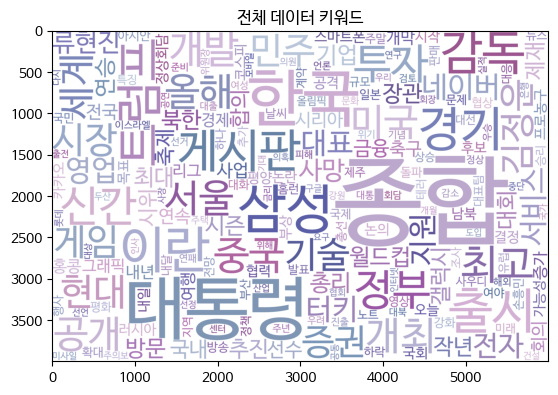

In [18]:
# fig , axes = plt.subplots(1,2,figsize=(15, 8))
# axx = axes.flatten()

text = ''
cat_df = train_df.reset_index(drop=True)
for i in range(len(cat_df)):
    text += str(cat_df.text[i]) + '\n'

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words)

wc = WordCloud(font_path=font_path, 
               width=3000, height=2000, scale=2.0,# max_font_size=250,
               background_color="white",
               color_func = color_func,collocations=False,)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.title('전체 데이터 키워드')
plt.imshow(gen)
print(c.most_common()[:15])

In [21]:
cat_list = ['IT', '경제', '사회', '생활', '세계', '스포츠', '정치']
def wordcloud_by_cat(idx):
    cat_list = ['IT', '경제', '사회', '생활', '세계', '스포츠', '정치']
    category = cat_list[idx]
    text = ''
    cat_df = train_df[train_df['target'] == idx].reset_index(drop=True)
    for i in range(len(cat_df)):
        text += str(cat_df.text[i]) + '\n'

    okt = Okt()
    nouns = okt.nouns(text) # 명사만 추출

    words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

    c = Counter(words)

    wc = WordCloud(font_path=font_path, 
                width=3000, height=2000, scale=2.0,# max_font_size=250,
                background_color="white",
                color_func = color_func,collocations=False,)
    gen = wc.generate_from_frequencies(c)

    plt.figure()
    plt.title(category + ' 데이터 키워드')
    plt.imshow(gen)
    print(c.most_common()[:15])

[('출시', 568), ('종합', 395), ('삼성', 380), ('개발', 359), ('기술', 313), ('갤럭시', 297), ('네이버', 245), ('서비스', 245), ('스마트폰', 208), ('공개', 208), ('전자', 206), ('노트', 183), ('게시판', 179), ('카카오', 159), ('구글', 146)]


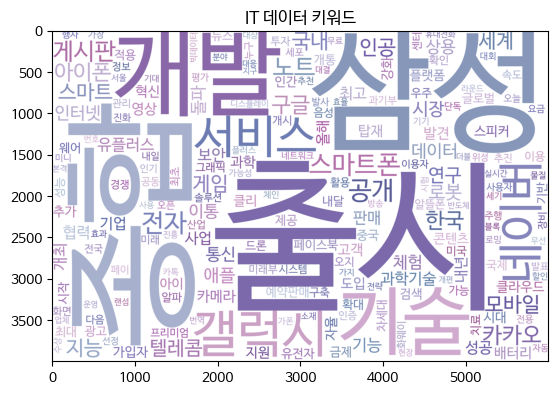

In [22]:
idx = 0
wordcloud_by_cat(idx)

[('종합', 637), ('투자', 474), ('증권', 405), ('영업', 389), ('삼성', 347), ('코스피', 283), ('금융', 261), ('작년', 249), ('증가', 226), ('실적', 216), ('특징', 216), ('대출', 207), ('하락', 196), ('출시', 196), ('시장', 192)]


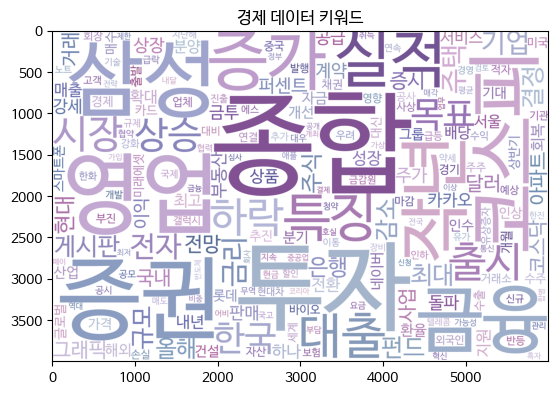

In [23]:
idx += 1
wordcloud_by_cat(idx)

[('종합', 416), ('게시판', 243), ('한국', 193), ('방송', 160), ('사장', 129), ('방통위', 126), ('뉴스', 115), ('기자', 114), ('지원', 99), ('개최', 98), ('사업', 94), ('언론', 90), ('협회', 90), ('회장', 84), ('수사', 81)]


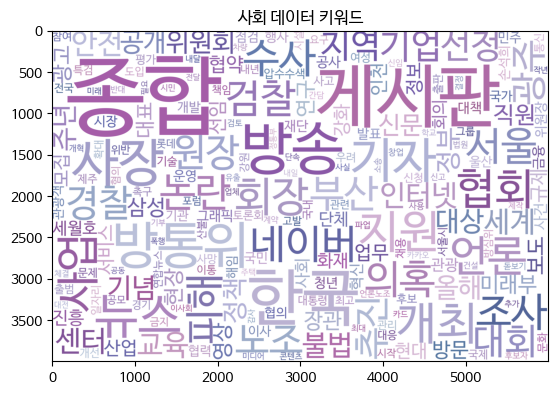

In [24]:
idx += 1
wordcloud_by_cat(idx)

[('신간', 606), ('축제', 306), ('여행', 265), ('날씨', 253), ('서울', 224), ('전국', 205), ('한국', 199), ('주말', 195), ('종합', 183), ('주의보', 178), ('제주', 177), ('공연', 160), ('개막', 150), ('최고', 149), ('문화', 144)]


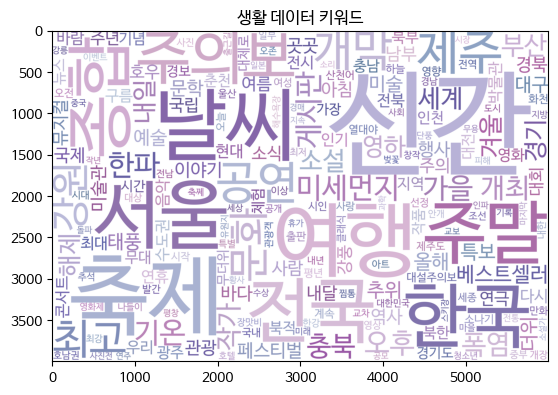

In [25]:
idx += 1
wordcloud_by_cat(idx)

[('종합', 1135), ('이란', 793), ('트럼프', 726), ('터키', 388), ('사망', 354), ('시위', 326), ('시리아', 325), ('중국', 310), ('대통령', 287), ('미국', 282), ('홍콩', 273), ('정부', 234), ('사우디', 225), ('공격', 224), ('이스라엘', 224)]


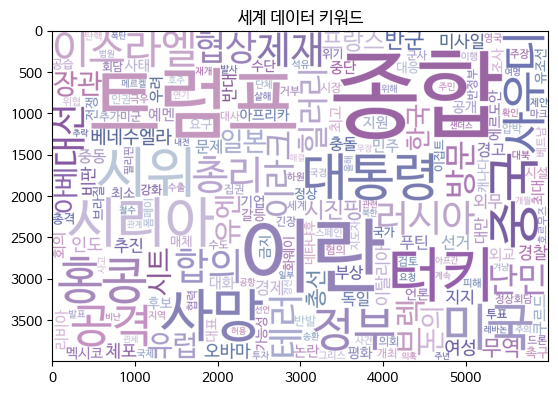

In [26]:
idx += 1
wordcloud_by_cat(idx)

[('감독', 712), ('경기', 564), ('류현진', 399), ('종합', 371), ('월드컵', 368), ('연승', 365), ('시즌', 351), ('선수', 317), ('리그', 311), ('프로농구', 308), ('축구', 290), ('한국', 272), ('아시안', 269), ('손흥민', 265), ('게임', 265)]


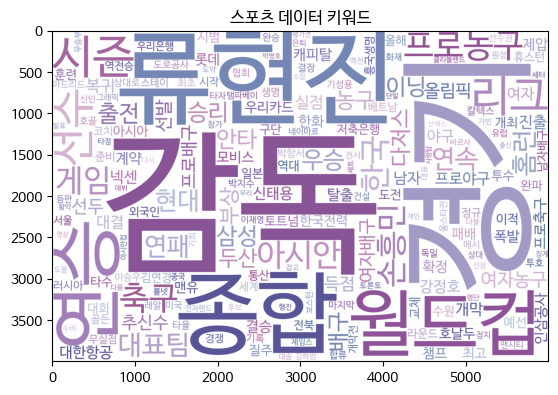

In [27]:
idx += 1
wordcloud_by_cat(idx)

[('대통령', 1367), ('종합', 1170), ('김정은', 374), ('민주', 326), ('한국', 306), ('정부', 271), ('국회', 261), ('평양', 255), ('정상회담', 251), ('여야', 250), ('남북', 246), ('북한', 243), ('대표', 201), ('대통', 178), ('회의', 173)]


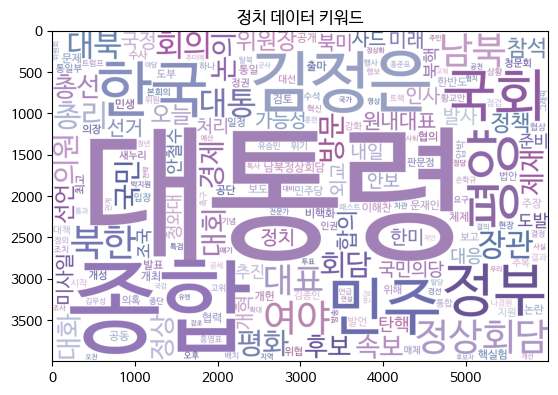

In [28]:
idx += 1
wordcloud_by_cat(idx)